In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import islice

In [2]:
# Importando o dataset e modificando o tipo da coluna "date_added".

netflix = pd.read_csv("netflix_titles.csv", index_col = "show_id")
netflix["date_added"] = pd.to_datetime(netflix["date_added"], format = "mixed")
netflix["date_added"] = netflix["date_added"].dt.date

In [3]:
# Padronizando o nome do índice e das colunas do dataset.

netflix.index.name = "Show ID"
netflix.index = netflix.index.str.title()

netflix.columns = netflix.columns.str.title()
netflix.columns = netflix.columns.str.replace("_", " ")

In [4]:
# Otimizando o dataset e tratando valores ausentes.

netflix["Type"] = netflix["Type"].astype("category")
netflix["Rating"] = netflix["Rating"].fillna("Unknown")
netflix["Rating"] = netflix["Rating"].astype("category")
netflix.drop("Description", axis = 1, inplace = True)

netflix["Director"] = netflix["Director"].fillna("Unknown")
netflix["Cast"] = netflix["Cast"].fillna("Unknown")
netflix["Country"] = netflix["Country"].fillna("Unknown")
netflix["Date Added"] = netflix["Date Added"].fillna("0000-00-00")
netflix["Duration"] = netflix["Duration"].fillna("Unknown")

De acordo com os dados fornecidos pelo dataset e distribuídos através do gráfico, conseguimos observar que, na Netflix, há mais presença de filmes do que séries.


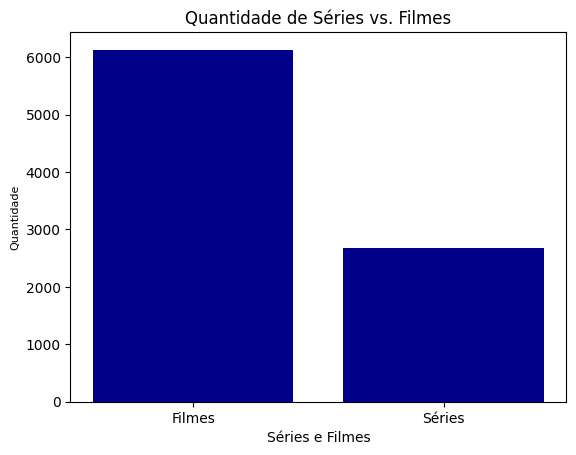

In [5]:
# 1. Quantidade de séries vs. filmes

quantidade_s_f = netflix["Type"].value_counts()
quant_dict = dict(quantidade_s_f)
quant_dict["Filmes"] = quant_dict.pop("Movie")
quant_dict["Séries"] = quant_dict.pop("TV Show")
x = quant_dict.keys()
y = quant_dict.values()

# 1.1 Representação visual (gráfico de barra)

plt.bar(x, y, color = "darkblue")
plt.title("Quantidade de Séries vs. Filmes")
plt.xlabel("Séries e Filmes", fontsize = 10)
plt.ylabel("Quantidade", fontsize = 8)
plt.show()

# Conclusão:

print("De acordo com os dados fornecidos pelo dataset e distribuídos através do gráfico, conseguimos observar que, na Netflix, há mais presença de filmes do que séries.")

Baseando-se nos dados fornecidos pelo dataset e distribuídos pelo gráfico de pizza, é possível concluir que a Netflix possui, em seu catálogo, mais títulos lançados no ano de 2018 do que em qualquer outro ano.


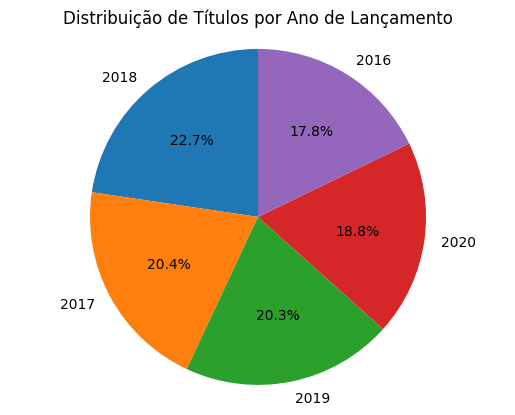

In [6]:
# 2. Distribuição de títulos por ano de lançamento

títulos_por_anos = netflix["Release Year"].value_counts()
títulos_dict = dict(títulos_por_anos)
primeiros_5 = dict(islice(títulos_dict.items(), 5))
chaves_5 = primeiros_5.keys()
valores_5 = primeiros_5.values()

# Representação visual (gráfico de pizza)

plt.pie(valores_5, labels = chaves_5, autopct = "%1.1f%%", startangle = 90)
plt.axis("equal")
plt.title("Distribuição de Títulos por Ano de Lançamento")
plt.show()

# Conclusão:

print("Baseando-se nos dados fornecidos pelo dataset e distribuídos pelo gráfico de pizza, é possível concluir que a Netflix possui, em seu catálogo, mais títulos lançados no ano de 2018 do que em qualquer outro ano.")

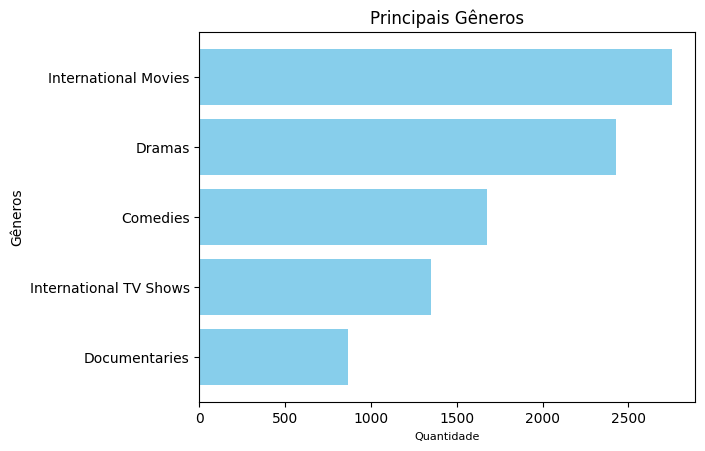

Através dos dados fornecidos pela coluna 'Listed In' do dataset, conseguimos identificar que os principais gêneros presentes no catálogo da Netflix são, respectivamente: 
1. 'Filmes Internacionais' 
2. 'Dramas' 
3. 'Comédia' 
4. 'Séries Internacionais' 
5. 'Documentários'


In [62]:
# 3. Principais gêneros

gêneros = netflix["Listed In"].str.split(",").explode().str.lstrip().value_counts()
dict_gêneros = dict(gêneros)
gêneros_5 = dict(islice(dict_gêneros.items(), 5))
chaves_gêneros = list(gêneros_5.keys())
valores_gêneros = list(gêneros_5.values())

# Representação visual (gráfico de barras horizontais)

plt.barh(chaves_gêneros[::-1], valores_gêneros[::-1], color = "skyblue")
plt.title("Principais Gêneros")
plt.xlabel("Quantidade", fontsize = 8)
plt.ylabel("Gêneros")
plt.show()

# Conclusão

print("Através dos dados fornecidos pela coluna 'Listed In' do dataset, conseguimos identificar que os principais gêneros presentes no catálogo da Netflix são, respectivamente: \n1. 'Filmes Internacionais' \n2. 'Dramas' \n3. 'Comédia' \n4. 'Séries Internacionais' \n5. 'Documentários'")